# Importar librerias

In [120]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.utils import to_categorical
from tensorflow import keras

# Cargar imagenes

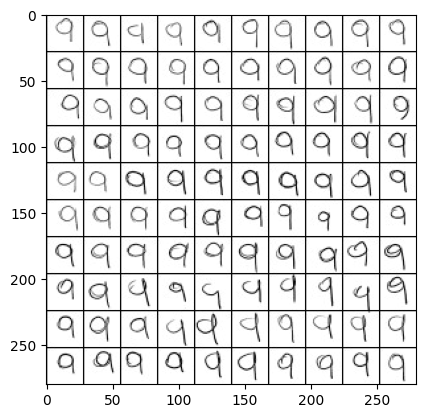

In [121]:
imagen = []
img_list = ["Uno 1.jpg", "Uno 2.jpg","Uno 3.jpg","Uno 4.jpg","Uno 5.jpg","Uno 6.jpg","Uno 7.jpg","Uno 8.jpg","Uno 9.jpg","Uno 10.jpg",
            "Dos 1.jpg","Dos 2.jpg","Dos 3.jpg","Dos 4.jpg","Dos 5.jpg","Dos 6.jpg","Dos 7.jpg","Dos 8.jpg","Dos 9.jpg","Dos 10.jpg",
            "Tres 1.jpg","Tres 2.jpg","Tres 3.jpg","Tres 4.jpg","Tres 5.jpg","Tres 6.jpg","Tres 7.jpg","Tres 8.jpg","Tres 9.jpg","Tres 10.jpg",
            "Cinco 1.jpg","Cinco 2.jpg","Cinco 3.jpg","Cinco 4.jpg","Cinco 5.jpg","Cinco 6.jpg","Cinco 7.jpg","Cinco 8.jpg","Cinco 9.jpg","Cinco 10.jpg",
            "Cero 1.jpg","Cero 2.jpg","Cero 3.jpg","Cero 4.jpg","Cero 5.jpg","Cero 6.jpg","Cero 7.jpg","Cero 8.jpg","Cero 9.jpg","Cero 10.jpg",
            "Nueve 1.jpg","Nueve 2.jpg","Nueve 3.jpg","Nueve 4.jpg","Nueve 5.jpg","Nueve 6.jpg","Nueve 7.jpg","Nueve 8.jpg","Nueve 9.jpg","Nueve 10.jpg",]
for img in img_list:
    imagen2 = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    imagen.append(imagen2)
plt.imshow(imagen[50], cmap='gray') #Cargar img para mostrar

# Dividir imagenes en 28 x 28

In [122]:
train_x = []
train_y = []
for k in range(len(imagen)):
    for i in range(0, 280, 28):
        for j in range(0, 280, 28):
            temp = imagen[k][i:i+28, j:j+28]
            train_x.append(temp)
            train_y.append(k)

# Elementos de la lista

In [123]:
print(len(train_x))
print(len(train_y))

6000
6000


In [124]:
len(img_list)

60

# Crear etiquetas y dividir en bloques de 28 x 28

In [125]:
lista_img = []
lista_img.append(("0(1).jpg","0(2).jpg","0(3).jpg","0(4).jpg","0(5).jpg","0(6).jpg","0(7).jpg","0(8).jpg","0(9).jpg","0(10).jpg", 0))
lista_img.append(("1(1).jpg","1(2).jpg","1(3).jpg","1(4).jpg","1(5).jpg","1(6).jpg","1(7).jpg","1(8).jpg","1(9).jpg","1(10).jpg", 1))
lista_img.append(("2(1).jpg","2(2).jpg","2(3).jpg","2(4).jpg","2(5).jpg","2(6).jpg","2(7).jpg","2(8).jpg","2(9).jpg","2(10).jpg", 2))
lista_img.append(("3(1).jpg","3(2).jpg","3(3).jpg","3(4).jpg","3(5).jpg","3(6).jpg","3(7).jpg","3(8).jpg","3(9).jpg","3(10).jpg", 3))
lista_img.append(("4(1).jpg","4(2).jpg","4(3).jpg","4(4).jpg","4(5).jpg","4(6).jpg","4(7).jpg","4(8).jpg","4(9).jpg","4(10).jpg", 4))
lista_img.append(("5(1).jpg","5(2).jpg","5(3).jpg","5(4).jpg","5(5).jpg","5(6).jpg","5(7).jpg","5(8).jpg","5(9).jpg","5(10).jpg", 5))
lista_img.append(("6(1).jpg","6(2).jpg","6(3).jpg","6(4).jpg","6(5).jpg","6(6).jpg","6(7).jpg","6(8).jpg","6(9).jpg","6(10).jpg", 6))
lista_img.append(("7(1).jpg","7(2).jpg","7(3).jpg","7(4).jpg","7(5).jpg","7(6).jpg","7(7).jpg","7(8).jpg","7(9).jpg","7(10).jpg", 7))
lista_img.append(("8(1).jpg","8(2).jpg","8(3).jpg","8(4).jpg","8(5).jpg","7(6).jpg","7(7).jpg","7(8).jpg","7(9).jpg","7(10).jpg", 8))
lista_img.append(("9(1).jpg","9(2).jpg","9(3).jpg","9(4).jpg","9(5).jpg","9(6).jpg","9(7).jpg","9(8).jpg","9(9).jpg","9(10).jpg", 9))

train_x = []
train_y = []
for k in range(len(imagen)):
    for i in range(0, 280, 28):
        for j in range(0, 280, 28):
            temp = imagen[k][i:i+28, j:j+28]
            train_x.append(temp)
            train_y.append(k)

# Definir modelo

In [126]:
# Convertir etiquetas a números del 0 al 9
train_y = [int(str(y)[0]) for y in train_y]
# Obtener número de clases
num_clases = len(np.unique(train_y))

# Convertir etiquetas a one-hot encoding
etiquetas_onehot = tf.keras.utils.to_categorical(train_y, num_clases)

# Convertir datos de entrenamiento a array numpy
train_x = np.array(train_x)
etiquetas_onehot = np.array(etiquetas_onehot)

# Definir modelo
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_clases, activation='softmax')
])

# Compilar y entrenar modelo

In [127]:
# Compilar modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
historial = model.fit(train_x, etiquetas_onehot, epochs=10, batch_size=32, verbose = False)

# Evaluar modelo
loss, acc = model.evaluate(train_x, etiquetas_onehot, verbose = False)
print(f'Accuracy: {acc}')

Accuracy: 0.8859999775886536


# Cargamos la imagen y la procesamos mediante la red neuronal convolucional previamente entrenada.

1/1 [==============================] - 0s 23ms/step
Predicción:Número 3
Seguridad del 12%
No se logra clasificar la imagen con precisión


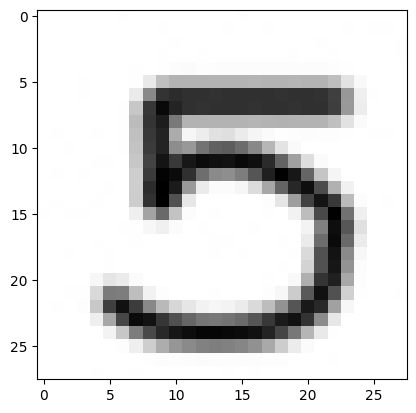

In [101]:
imagen = cv2.imread('5(4).jpg', cv2.IMREAD_GRAYSCALE)
imagen = cv2.resize(imagen, (28, 28))
plt.imshow(imagen.squeeze(), cmap='gray')

imagen = imagen / 255.0
imagen = imagen.reshape(1, 28, 28, 1)
imagen = np.expand_dims(imagen, axis=-1)

prediccion = model.predict(imagen)

etiquetas_predichas = np.argmax(prediccion, axis=1)

maxscore = np.max(prediccion)
print("Predicción:Número " + str(etiquetas_predichas[0]))
print("Seguridad del " + str(int(maxscore * 100)) + "%")

if maxscore >= 0.6:
    print("La imagen es un " + str(etiquetas_predichas[0]))
else:
    print("No se logra clasificar la imagen con precisión")
